# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip -q
!pip install -U setuptools wheel -q
!pip install -U "mxnet<2.0.0" bokeh==2.0.1 -q
!pip install autogluon --no-cache-dir -q
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 27.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.3.8 requires bokeh<3.4.0,>=3.2.0, but you have bokeh 2.0.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 18

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "name"
kaggle_key = "key"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 62.8MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
predictor = TabularPredictor(label="count",
                                          problem_type= 'regression',
                                          eval_metric="root_mean_squared_error",
                                          learner_kwargs={"ignored_columns":["casual", "registered"]}).fit(train_data=train,
                                                                                              time_limit=600,
                                                                                              presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240509_041541"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240509_041541/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 183 seconds

### Review AutoGluon's training run with ranking of models that did the best.

In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.970248  root_mean_squared_error      16.757771  421.769461                0.000624           0.031264            3       True         13
1   RandomForestMSE_BAG_L2  -53.210091  root_mean_squared_error      12.967188  334.307853                0.582958          41.551433            2       True         12
2          LightGBM_BAG_L2  -55.087285  root_mean_squared_error      12.817931  320.448257                0.433701          27.691838            2       True         11
3        LightGBMXT_BAG_L2  -60.453210  root_mean_squared_error      15.740488  352.494927                3.356258          59.738508            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.069019    0.047380   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.65959587063145

### Create predictions from test dataset

In [12]:
predictions = predictor.predict(test)
predictions.head()

0    21.964756
1    41.934196
2    45.618744
3    49.203106
4    51.802795
Name: count, dtype: float32

In [13]:
predictions

0        21.964756
1        41.934196
2        45.618744
3        49.203106
4        51.802795
           ...    
6488    158.008331
6489    158.008331
6490    156.835876
6491    154.710464
6492    150.461838
Name: count, Length: 6493, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.727303
std        89.719658
min         3.085609
25%        20.441893
50%        63.899448
75%       167.295349
max       366.534058
Name: count, dtype: float64

In [15]:
# How many negative values do we have?
n = (predictions < 0).sum().sum()
n

0

In [16]:
# Set them to zero
predictions[predictions<0] = 0
(predictions < 0).sum().sum()

0

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 458kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv               2024-05-09 04:26:56  first raw submission                 pending                              
submission_new_hpo1.csv      2024-05-05 16:35:21  new features with hyperparameters 3  complete  0.52539      0.52539       
submission_new_hpo1.csv      2024-05-05 15:58:46  new features with hyperparameters 2  complete  0.52539      0.52539       
submission_new_hpo1.csv      2024-05-05 15:46:23  new features with hyperparameters 1  complete  0.52539      0.52539       
submission_new_features.csv  2024-05-05 15:17:15  new features                         complete  0.47727      0.47727       
submission.csv               2024-05-05 15:00:06  first raw submission                 complete  1.80106      1.80106       


#### Initial score of `1.79715`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [20]:
import matplotlib.pyplot as plt


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

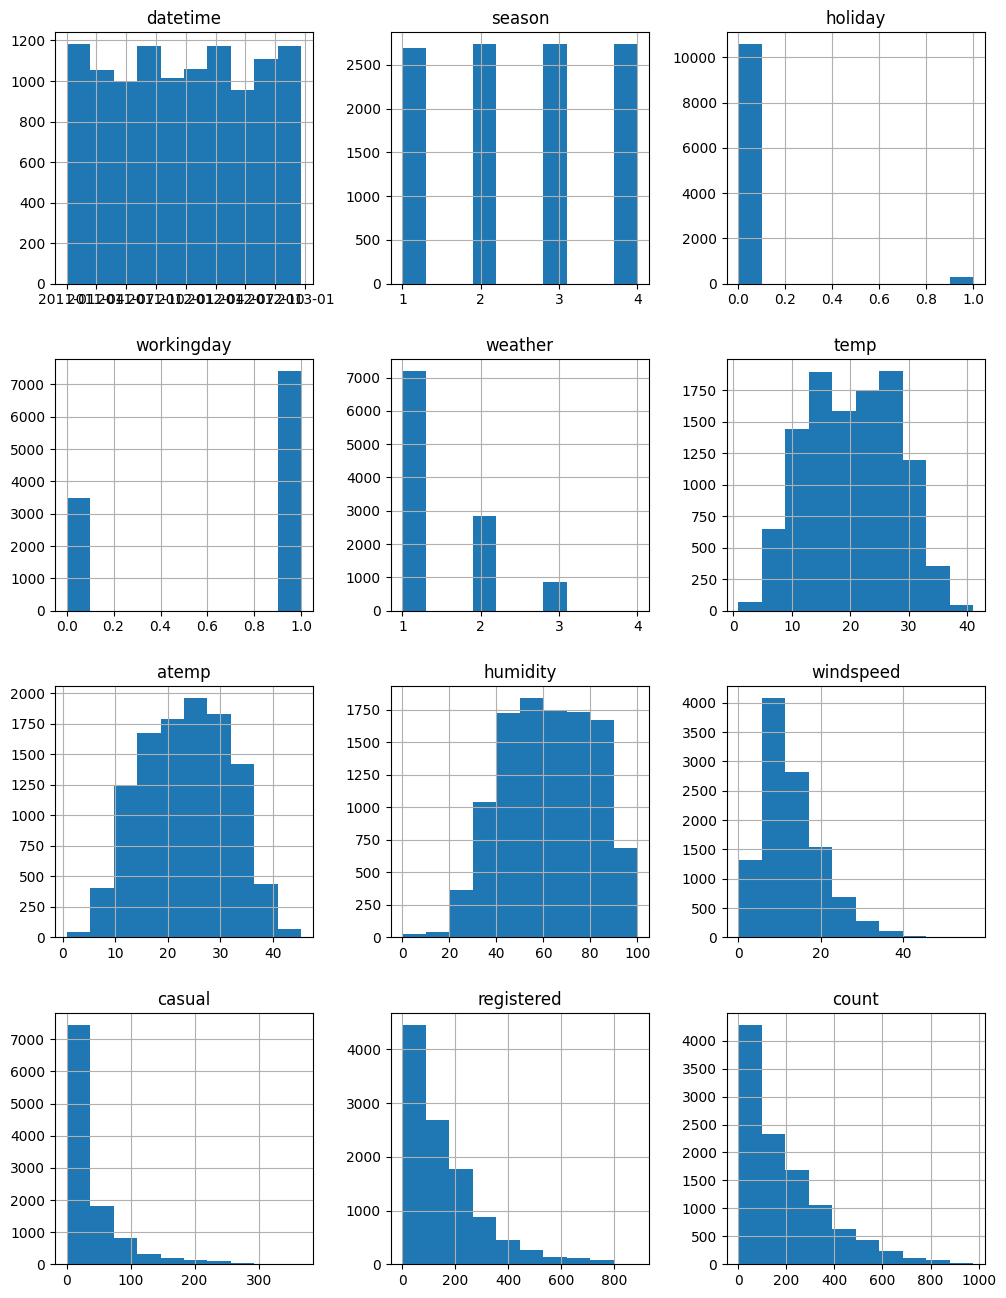

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(12,16))


<Figure size 1000x1000 with 0 Axes>

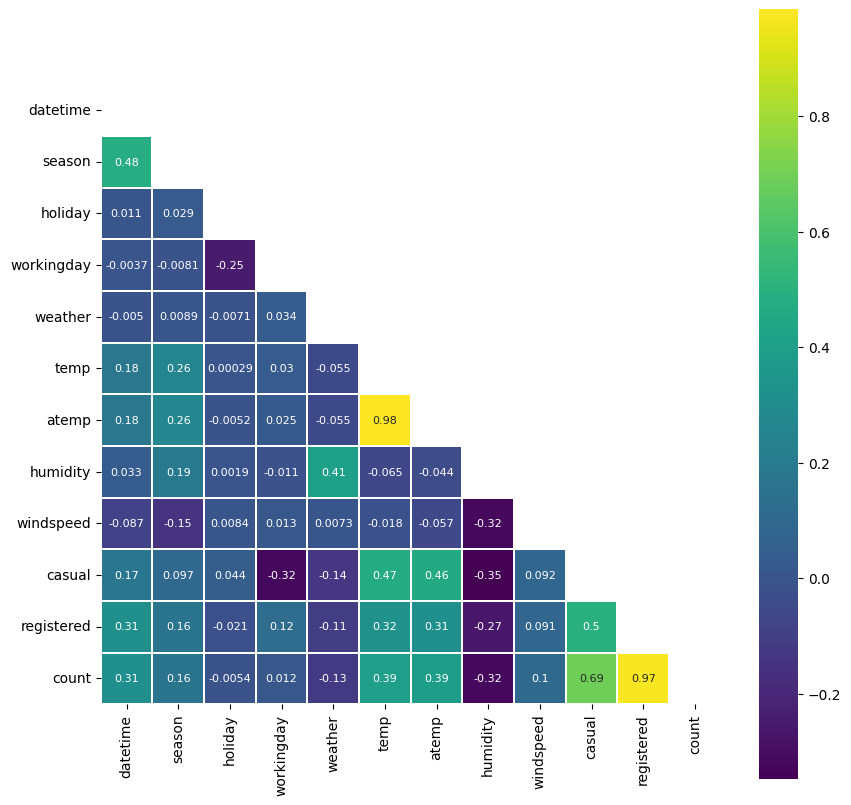

In [22]:
# correlation matrix:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

SIZE = (10,10)

plt.figure(figsize = SIZE)
f, mapp = plt.subplots(figsize=SIZE)

corr_data = train.copy()
corr_matrix = corr_data.corr()

corr_mask = np.zeros_like(corr_matrix) # mask to avoid displaying rep3ated boxes
corr_mask[np.triu_indices_from(corr_mask)] = True # set top half to 1 to avoid
mapp = sns.heatmap(corr_matrix, cmap="viridis", linewidths=0.01, mask = corr_mask, annot=True, annot_kws={"size":8}, square = True)
plt.show()

In [23]:
# drop highly corelated data: 'atemp'
train.drop(["atemp"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

train.drop(["registered"], axis=1, inplace=True)
# test.drop(["registered"], axis=1, inplace=True)

In [24]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,40


In [25]:
train['datetime'].head(10)

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
5   2011-01-01 05:00:00
6   2011-01-01 06:00:00
7   2011-01-01 07:00:00
8   2011-01-01 08:00:00
9   2011-01-01 09:00:00
Name: datetime, dtype: datetime64[ns]

In [26]:
#train
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek
train["hour"] = train["datetime"].dt.hour

train.drop(["datetime"], axis=1, inplace=True)    # remove original dateteime from train dataset
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count,year,month,day,hour
0,1,0,0,1,9.84,81,0.0,3,16,2011,1,5,0
1,1,0,0,1,9.02,80,0.0,8,40,2011,1,5,1
2,1,0,0,1,9.02,80,0.0,5,32,2011,1,5,2
3,1,0,0,1,9.84,75,0.0,3,13,2011,1,5,3
4,1,0,0,1,9.84,75,0.0,0,1,2011,1,5,4


In [27]:
test['datetime'].head()

0   2011-01-20 00:00:00
1   2011-01-20 01:00:00
2   2011-01-20 02:00:00
3   2011-01-20 03:00:00
4   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]

In [28]:
#test
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek
test["hour"] = test["datetime"].dt.hour

test.drop(["datetime"], axis=1, inplace=True)   # remove original datetime col frommtest dataset
test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,56,11.0014,2011,1,3,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [29]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count,year,month,day,hour
0,1,0,0,1,9.84,81,0.0,3,16,2011,1,5,0
1,1,0,0,1,9.02,80,0.0,8,40,2011,1,5,1
2,1,0,0,1,9.02,80,0.0,5,32,2011,1,5,2
3,1,0,0,1,9.84,75,0.0,3,13,2011,1,5,3
4,1,0,0,1,9.84,75,0.0,0,1,2011,1,5,4


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   casual      10886 non-null  int64  
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int32  
 10  month       10886 non-null  int32  
 11  day         10886 non-null  int32  
 12  hour        10886 non-null  int32  
dtypes: float64(2), int32(4), int64(7)
memory usage: 935.6 KB


In [31]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [32]:
# add feature for wwekday/holiday/weekend

# holiday=1 -> holiday
# holiday=0 & workingday=1 -> weekday
# holiday=0 & workingday=0 -> weekend


# train data
train["type_of_day"]=""
train.loc[(train.holiday==1),"type_of_day"] = "holiday"
train.loc[((train.holiday==0) & (train.workingday==1)), "type_of_day"] = "weekday"
train.loc[((train.holiday==0) & (train.workingday==0)), "type_of_day"] = "weekend"

# test
test["type_of_day"]=""
test.loc[(test.holiday==1),"type_of_day"] = "holiday"
test.loc[((test.holiday==0) & (test.workingday==1)), "type_of_day"] = "weekday"
test.loc[((test.holiday==0) & (test.workingday==0)), "type_of_day"] = "weekend"


In [33]:
train["type_of_day"] = train["type_of_day"].astype("category")
test["type_of_day"] = test["type_of_day"].astype("category")

In [34]:
# View new feature
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       10886 non-null  category
 1   holiday      10886 non-null  int64   
 2   workingday   10886 non-null  int64   
 3   weather      10886 non-null  category
 4   temp         10886 non-null  float64 
 5   humidity     10886 non-null  int64   
 6   windspeed    10886 non-null  float64 
 7   casual       10886 non-null  int64   
 8   count        10886 non-null  int64   
 9   year         10886 non-null  int32   
 10  month        10886 non-null  int32   
 11  day          10886 non-null  int32   
 12  hour         10886 non-null  int32   
 13  type_of_day  10886 non-null  category
dtypes: category(3), float64(2), int32(4), int64(5)
memory usage: 798.0 KB


array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

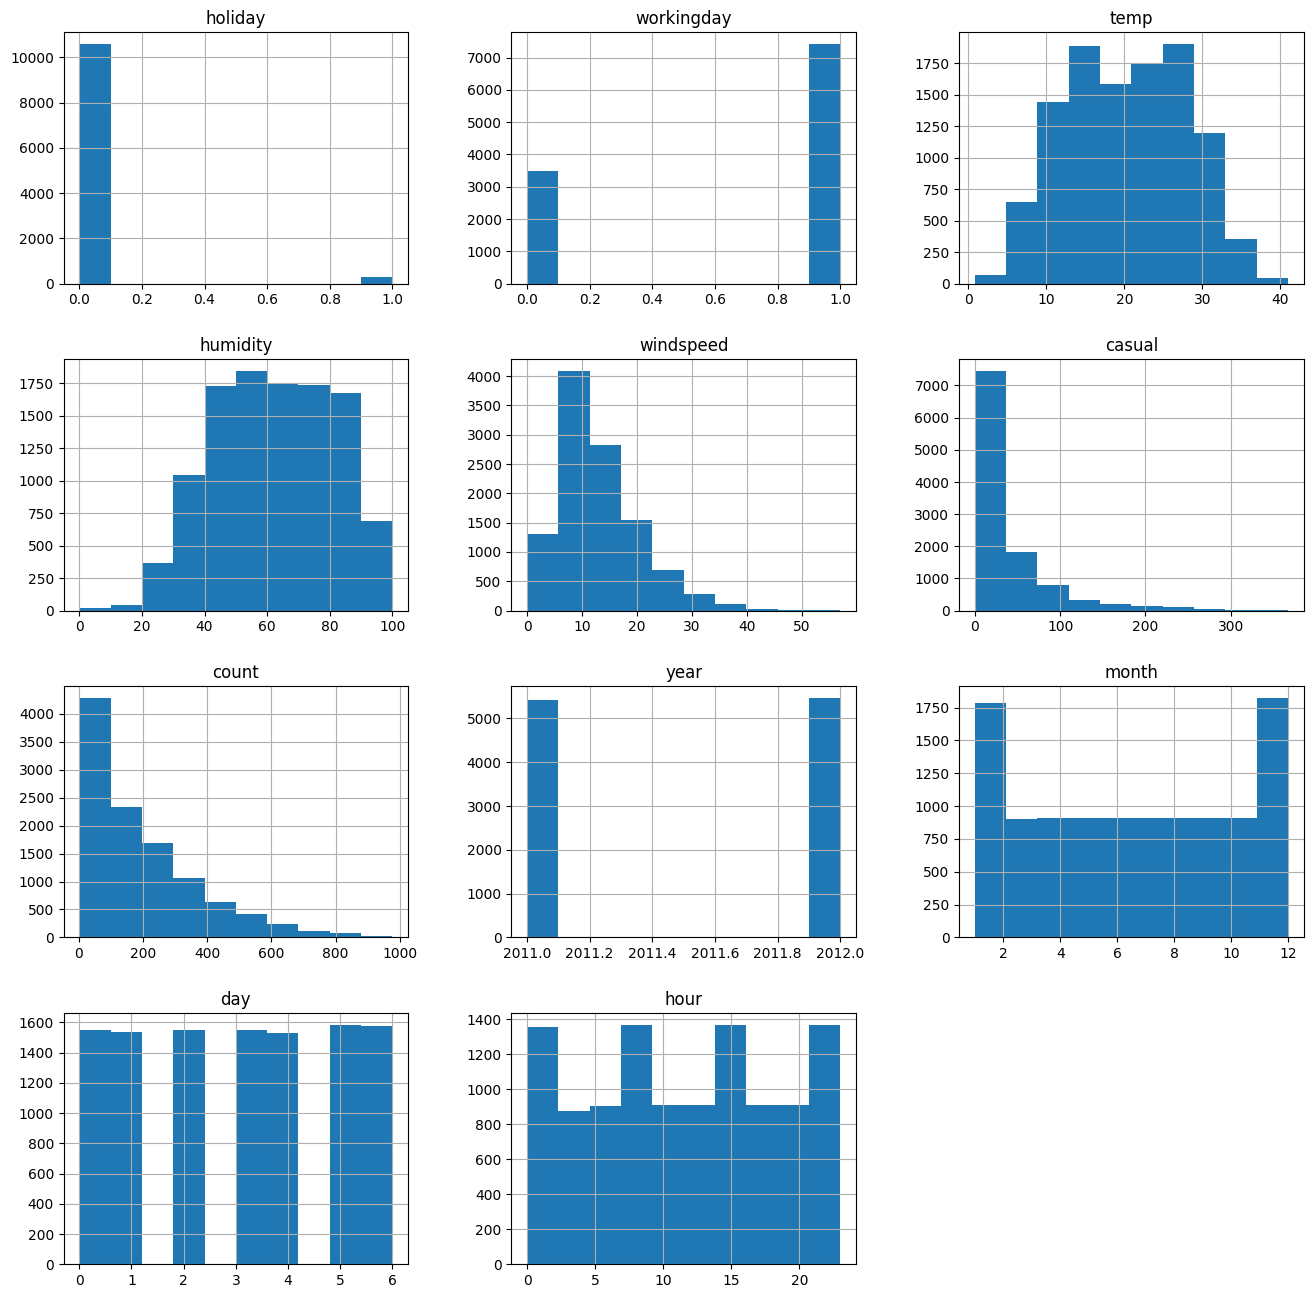

In [35]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(16,16))

In [36]:
# viz data wrt to day date year and seasons

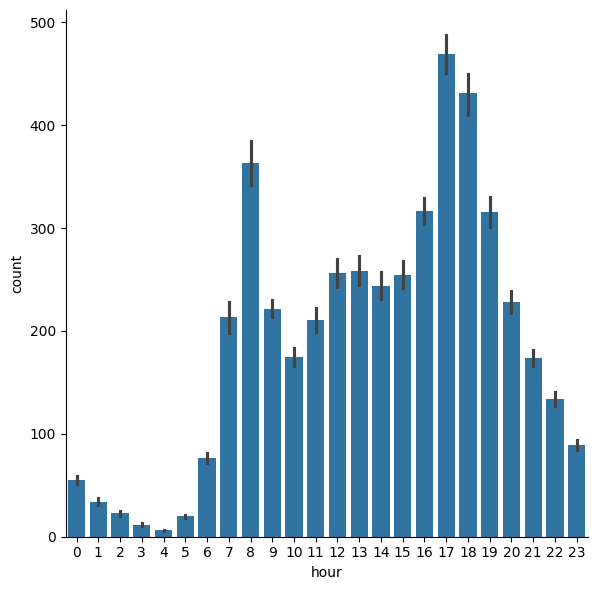

In [37]:
#hour
sns.catplot(x="hour",y="count",data=train,kind='bar',height=6)

([<matplotlib.axis.XTick at 0x7f2cd1cc0c10>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

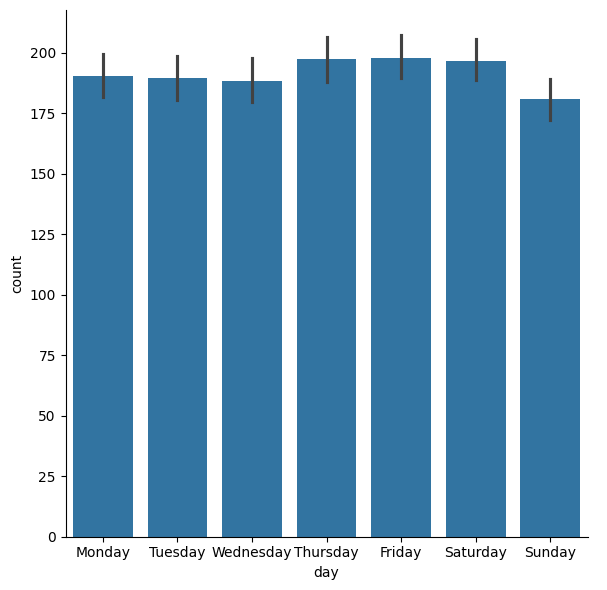

In [38]:
#day
sns.catplot(x="day",y="count",data=train,kind='bar',height=6)
plt.xticks(ticks=range(0,7), labels=["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"]) # 0 monday; 6 sunday

([<matplotlib.axis.XTick at 0x7f2cd1a18550>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

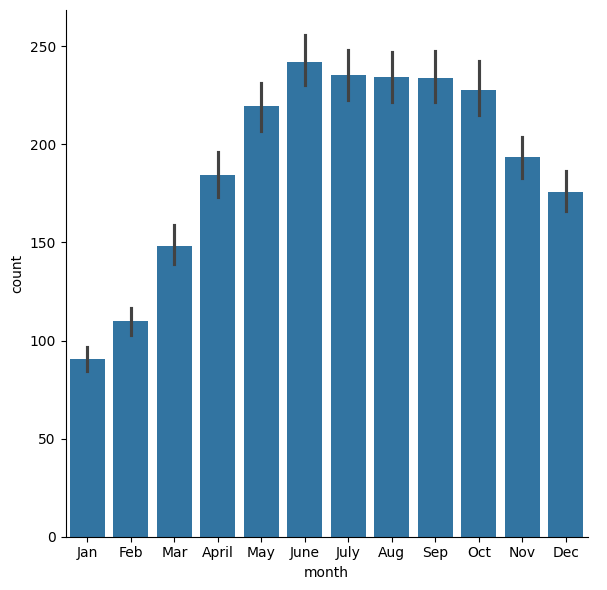

In [39]:
#month
sns.catplot(x="month",y="count",data=train,kind='bar',height=6)
plt.xticks(ticks=range(0,12), labels=["Jan", "Feb", "Mar","April", "May", "June", "July","Aug", "Sep", "Oct", "Nov", "Dec"])

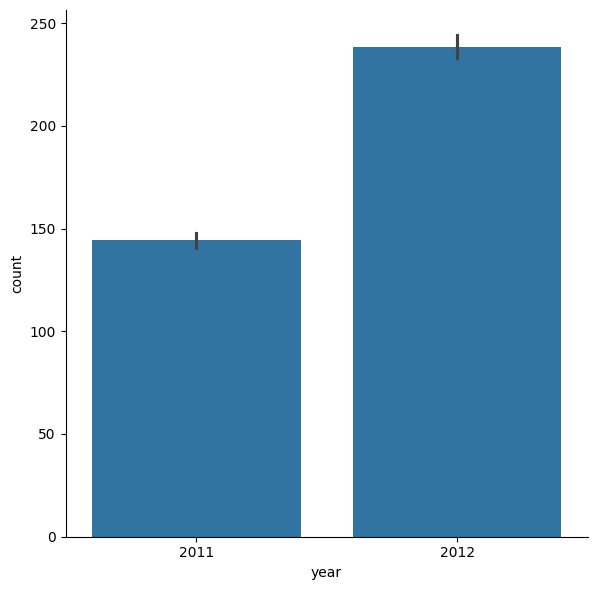

In [40]:
#year
sns.catplot(x="year",y="count",data=train,kind='bar',height=6)

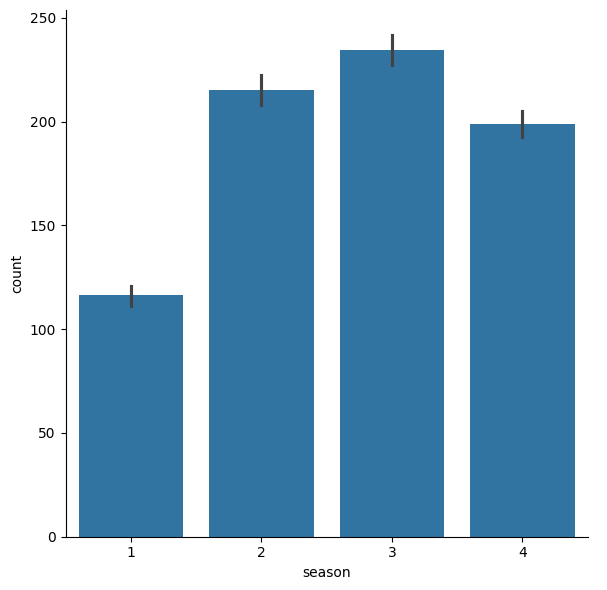

In [41]:
#Season
sns.catplot(x="season",y="count",data=train,kind='bar',height=6)

([<matplotlib.axis.XTick at 0x7f2cd1855270>,
 [Text(0, 0, 'Clear'),
  Text(1, 0, 'Misty'),
  Text(2, 0, 'Light'),
  Text(3, 0, 'Heavy')])

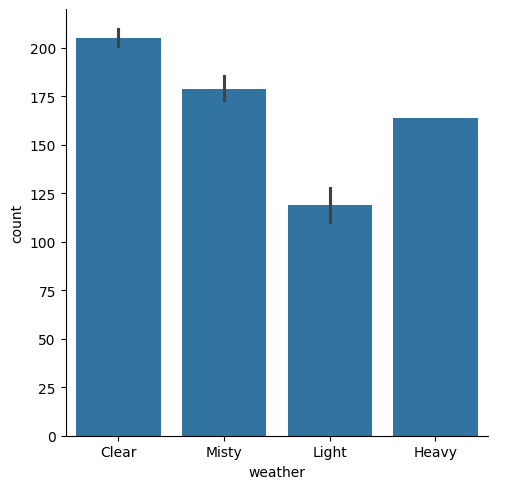

In [42]:
#weather
sns.catplot(x="weather",y="count",data=train,kind='bar',height=5)
plt.xticks(ticks=range(0,4), labels=["Clear","Misty","Light", "Heavy"])

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       10886 non-null  category
 1   holiday      10886 non-null  int64   
 2   workingday   10886 non-null  int64   
 3   weather      10886 non-null  category
 4   temp         10886 non-null  float64 
 5   humidity     10886 non-null  int64   
 6   windspeed    10886 non-null  float64 
 7   casual       10886 non-null  int64   
 8   count        10886 non-null  int64   
 9   year         10886 non-null  int32   
 10  month        10886 non-null  int32   
 11  day          10886 non-null  int32   
 12  hour         10886 non-null  int32   
 13  type_of_day  10886 non-null  category
dtypes: category(3), float64(2), int32(4), int64(5)
memory usage: 798.0 KB


In [44]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count,year,month,day,hour,type_of_day
0,1,0,0,1,9.84,81,0.0,3,16,2011,1,5,0,weekend
1,1,0,0,1,9.02,80,0.0,8,40,2011,1,5,1,weekend
2,1,0,0,1,9.02,80,0.0,5,32,2011,1,5,2,weekend
3,1,0,0,1,9.84,75,0.0,3,13,2011,1,5,3,weekend
4,1,0,0,1,9.84,75,0.0,0,1,2011,1,5,4,weekend


In [45]:
train.describe()

,holiday,workingday,temp,humidity,windspeed,casual,count,year,month,day,hour
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,61.886460,12.799395,36.021955,191.574132,2011.501929,6.521495,3.013963,11.541613
std,0.166599,0.466159,7.79159,19.245033,8.164537,49.960477,181.144454,0.500019,3.444373,2.004585,6.915838
min,0.000000,0.000000,0.82000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,13.94000,47.000000,7.001500,4.000000,42.000000,2011.000000,4.000000,1.000000,6.000000
50%,0.000000,1.000000,20.50000,62.000000,12.998000,17.000000,145.000000,2012.000000,7.000000,3.000000,12.000000
75%,0.000000,1.000000,26.24000,77.000000,16.997900,49.000000,284.000000,2012.000000,10.000000,5.000000,18.000000
max,1.000000,1.000000,41.00000,100.000000,56.996900,367.000000,977.000000,2012.000000,12.000000,6.000000,23.000000


## Step 5: Rerun the model with the same settings as before, just with more features

In [46]:
predictor_new_features = TabularPredictor(label="count",
                                          problem_type= 'regression',
                                          eval_metric="root_mean_squared_error",
                                          learner_kwargs={"ignored_columns":["casual", "registered"]}).fit(train_data=train,
                                                                                              time_limit=600,
                                                                                              presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240509_042709"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240509_042709/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 162 seconds

In [47]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.203060  root_mean_squared_error      19.864513  418.317433                0.001436           0.079422            3       True         14
1      WeightedEnsemble_L2  -34.303098  root_mean_squared_error      17.722257  268.316692                0.000797           0.037384            2       True          9
2          LightGBM_BAG_L2  -34.890049  root_mean_squared_error      18.660158  330.241308                0.129666          23.482293            2       True         11
3        LightGBMXT_BAG_L2  -35.056303  root_mean_squared_error      19.045769  331.826298                0.515278          25.067282            2       True         10
4   RandomForestMSE_BAG_L2  -35.163978  root_mean_squared_error      19.111998  348.121201   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.26164315463612,
  'KNeighborsDist_BAG_L1': -109.84517207130654,
  'LightGBMXT_BAG_L1': -36.7080198842608,
  'LightGBM_BAG_L1': -35.78035548163389,
  'RandomForestMSE_BAG_L1': -39.717

In [48]:
new_predcitions = predictor_new_features.predict(test)

In [49]:
new_predcitions.head()

0    14.280601
1     5.319111
2     3.521336
3     2.557950
4     2.575316
Name: count, dtype: float32

In [50]:
# Remember to set all negative values to zero
n = (new_predcitions < 0).sum().sum()
n

40

In [51]:
new_predcitions[new_predcitions<0] = 0
(new_predcitions < 0).sum().sum()

0

In [52]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv")
submission_new_features["count"] = new_predcitions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [53]:
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,14.280601
1,2011-01-20 01:00:00,5.319111
2,2011-01-20 02:00:00,3.521336
3,2011-01-20 03:00:00,2.557950
4,2011-01-20 04:00:00,2.575316


In [54]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 441kB/s]
Successfully submitted to Bike Sharing Demand

In [55]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 8

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-09 04:38:01  new features                         complete  0.48708      0.48708       
submission.csv               2024-05-09 04:26:56  first raw submission                 complete  1.79942      1.79942       
submission_new_hpo1.csv      2024-05-05 16:35:21  new features with hyperparameters 3  complete  0.52539      0.52539       
submission_new_hpo1.csv      2024-05-05 15:58:46  new features with hyperparameters 2  complete  0.52539      0.52539       
submission_new_hpo1.csv      2024-05-05 15:46:23  new features with hyperparameters 1  complete  0.52539      0.52539       
submission_new_features.csv  2024-05-05 15:17:15  new features                         complete  0.47727      0.47727       


#### New Score of `0.47803`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [56]:
import autogluon as ag
# hyperparamerers from : https://auto.gluon.ai/0.0.15/tutorials/tabular_prediction/tabular-indepth.html


nn_options = {'num_epochs': 5,
              'learning_rate': ag.common.space.Real(1e-4, 1e-2, default=5e-4, log=True),
              'activation': ag.common.space.Categorical('relu', 'softrelu', 'tanh'),
              'dropout_prob': ag.common.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True,
                'num_boost_round': ag.common.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.common.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {'GBM': gbm_options,
                   'NN_TORCH': nn_options}  # "NN" doesnt work... :(


hyperparameter_tune_kwargs = {
    'num_trials': 12,
    'scheduler' : "local",
    'searcher' : 'auto'
}


# # Errors links: https://stackoverflow.com/questions/77781453/autogluon-core-space-attribute-not-found
# https://auto.gluon.ai/stable/tutorials/tabular/tabular-indepth.html

In [61]:
predictor_new_hpo1 = TabularPredictor(label="count",
                                          problem_type= 'regression',
                                          eval_metric="root_mean_squared_error",
                                          learner_kwargs={"ignored_columns":["casual", "registered"]}).fit(train_data=train,
                                                                                              time_limit=600,
                                                                                              hyperparameters=hyperparameters,
                                                                                              hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                                              presets=['optimize_for_deployment'],
                                                                                              refit_full='best')


No path specified. Models will be saved in: "AutogluonModels/ag-20240509_044853"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240509_044853"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       10.05 GB / 12.67 GB (79.3%)
Disk Space Avail:   43.57 GB / 78.19 GB (55.7%)
Train Data Rows:    10886
Train Data Columns: 13
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10294.42 MB
	Train Data (Original)  Memory Usage: 0.61 MB (0.0% of available m

  0%|          | 0/12 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-71.9711	 = Validation score   (-root_mean_squared_error)
	0.49s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-45.8136	 = Validation score   (-root_mean_squared_error)
	0.7s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-47.839	 = Validation score   (-root_mean_squared_error)
	0.94s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-41.7586	 = Validation score   (-root_mean_squared_error)
	0.85s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-66.7598	 = Validation score   (-root_mean_squared_error)
	0.72s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-107.2717	 = Validation score   (-root_mean_squared_error)
	0.71s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-45.7988	 = Validation score   (-root_mean_squared_error)
	0.79s	 = Trainin

  0%|          | 0/12 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924


Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	2.65s	 = Training   runtime
	0.21s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.19s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	2.8s	 = Training   runtime
	0.39s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	9.75s	 = Training   runtime
	0.87s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	2.21s	 = Training   runtime
	0.19s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	3.67s	 = Training   runtime
	0.28s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-38.6204	 = Validation score   (-root_mean_squared_error)
	1.44s	 = Training   runtime
	0.

In [62]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.472579  root_mean_squared_error       2.322064  24.128052                0.000670           0.013661            2       True          5
1          LightGBM/T4 -38.124006  root_mean_squared_error       0.868764   9.753077                0.868764           9.753077            1       True          1
2         LightGBM/T12 -38.431862  root_mean_squared_error       1.115615  10.692485                1.115615          10.692485            1       True          3
3        LightGBMLarge -38.516436  root_mean_squared_error       0.307359   2.674432                0.307359           2.674432            1       True          4
4         LightGBM/T10 -38.559673  root_mean_squared_error       0.029657   0.994398                0.029657           0.99

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -38.12400606131232,
  'LightGBM/T10': -38.55967268294494,
  'LightGBM/T12': -38.431861570431245,
  'LightGBMLarge': -38.51643622165731,
  'WeightedEnsemble_L2': -37.472579251159935},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': ['LightGBM', 'T4'],
  'LightGBM/T10': ['LightGBM', 'T10'],
  'LightGBM/T12': ['LightGBM', 'T12'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T4': 9.753077030181885,
  'LightGBM/T10': 0.9943983554840088,
  'LightGBM/T12': 10.692484617233276,
  'LightGBMLarge': 2.674431562423706,
  'WeightedEnsemble_L2': 0.013660907745361328},
 'model_pred_times': {'LightGBM/T4': 0.8687641620635986,
  'LightGBM/T10': 0.02965712547302246,
  'LightGBM/T12': 1.115

In [63]:
hpo1 =   pd.DataFrame(predictor_new_hpo1.leaderboard(silent=True))
hpo1

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.472579,root_mean_squared_error,2.322064,24.128052,0.000670,0.013661,2,True,5
1,LightGBM/T4,-38.124006,root_mean_squared_error,0.868764,9.753077,0.868764,9.753077,1,True,1
2,LightGBM/T12,-38.431862,root_mean_squared_error,1.115615,10.692485,1.115615,10.692485,1,True,3
3,LightGBMLarge,-38.516436,root_mean_squared_error,0.307359,2.674432,0.307359,2.674432,1,True,4
4,LightGBM/T10,-38.559673,root_mean_squared_error,0.029657,0.994398,0.029657,0.994398,1,True,2


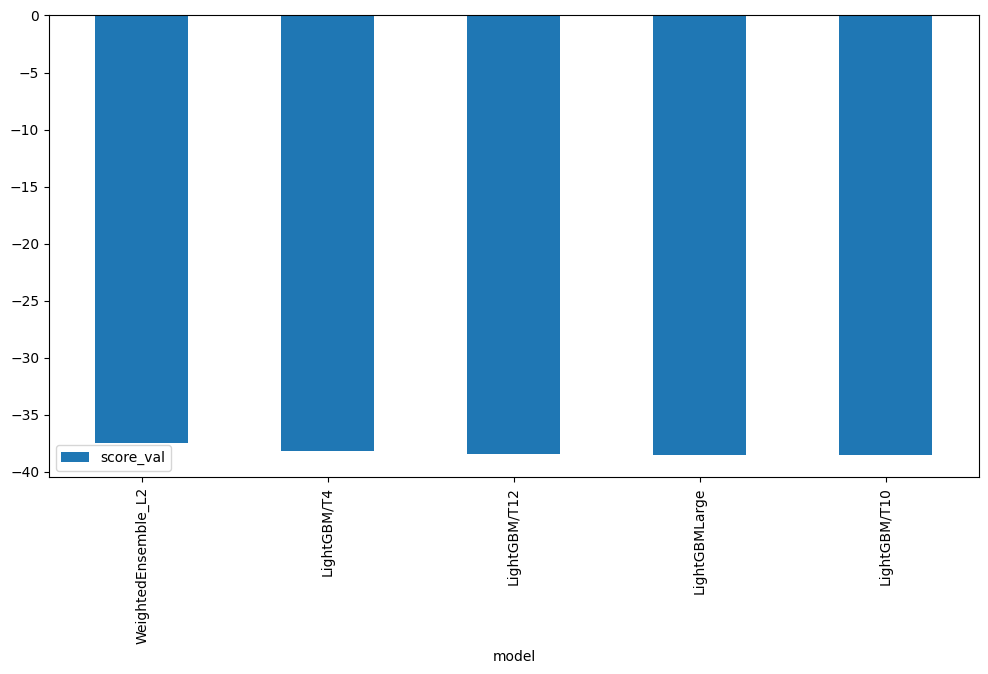

In [64]:
hpo1.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.show()

In [65]:
predictions_new_hpo1 = predictor_new_hpo1.predict(test)

predictions_new_hpo1.head()

0    18.867224
1     3.012300
2     0.824790
3     0.881535
4     0.899031
Name: count, dtype: float32

In [66]:
# Remember to set all negative values to zero
n = (predictions_new_hpo1 < 0).sum().sum()
n

79

In [67]:
predictions_new_hpo1[predictions_new_hpo1<0] = 0
(predictions_new_hpo1 < 0).sum().sum()

0

In [68]:
# Same submitting predictions
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo1["count"] = predictions_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [69]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 1"

100% 188k/188k [00:00<00:00, 203kB/s]
Successfully submitted to Bike Sharing Demand

In [73]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 14

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2024-05-09 04:53:39  new features with hyperparameters 1  complete  0.53243      0.53243       
submission_new_features.csv  2024-05-09 04:38:01  new features                         complete  0.48708      0.48708       
submission.csv               2024-05-09 04:26:56  first raw submission                 complete  1.79942      1.79942       
submission_new_hpo1.csv      2024-05-05 16:35:21  new features with hyperparameters 3  complete  0.52539      0.52539       
submission_new_hpo1.csv      2024-05-05 15:58:46  new features with hyperparameters 2  complete  0.52539      0.52539       
submission_new_hpo1.csv      2024-05-05 15:46:23  new features with hyperparameters 1  complete  0.52539      0.52539       


#### New Score of `?`

##HPO2

In [71]:
nn_options = {'num_epochs': 5,
              'learning_rate': ag.common.space.Real(1e-4, 1e-2, default=5e-4, log=True),
              'activation': ag.common.space.Categorical('relu', 'softrelu', 'tanh'),
              'dropout_prob': ag.common.space.Real(0.0, 0.5, default=0.1)}

knn_options = [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}},
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}}]

gbm_options = [{'extra_trees': True,
                'num_boost_round': ag.common.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.common.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' depricated
                'eval_metric': 'rmse',
                'eta':.3,
                'max_depth':ag.common.space.Int(lower=5, upper=8, default=6),
                'n_estimators': ag.common.space.Int(lower=100, upper=500, default=100),
                'subsample': 1,
                'colsample_bytree': 1}]



hyperparameters = {'GBM': gbm_options,
                  #  'NN_TORCH': nn_options,
                   'XGB': xgb_options,
                   'KNN': knn_options
                   }

hyperparameter_tune_kwargs = {
    'num_trials': 12,
    'scheduler' : "local",
    'searcher' : 'auto'
}


In [74]:
predictor_new_hpo2 = TabularPredictor(label="count",
                                          problem_type= 'regression',
                                          eval_metric="root_mean_squared_error",
                                          learner_kwargs={"ignored_columns":["casual", "registered"]}).fit(train_data=train,
                                                                                              time_limit=600,
                                                                                              hyperparameters=hyperparameters,
                                                                                              hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                                              presets=['optimize_for_deployment'],
                                                                                              refit_full='best',
                                                                                              excluded_model_types=['NN_TORCH'])

No path specified. Models will be saved in: "AutogluonModels/ag-20240509_045436"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240509_045436"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       9.95 GB / 12.67 GB (78.5%)
Disk Space Avail:   43.51 GB / 78.19 GB (55.6%)
Train Data Rows:    10886
Train Data Columns: 13
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10187.60 MB
	Train Data (Original)  Memory Usage: 0.61 MB (0.0% of available me

  0%|          | 0/12 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-71.9711	 = Validation score   (-root_mean_squared_error)
	0.55s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-45.8136	 = Validation score   (-root_mean_squared_error)
	0.77s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-47.839	 = Validation score   (-root_mean_squared_error)
	1.03s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-41.7586	 = Validation score   (-root_mean_squared_error)
	0.87s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-66.7598	 = Validation score   (-root_mean_squared_error)
	0.77s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-107.2717	 = Validation score   (-root_mean_squared_error)
	0.69s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-45.7988	 = Validation score   (-root_mean_squared_error)
	0.59s	 = Train

  0%|          | 0/12 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924


Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	1.9s	 = Training   runtime
	0.19s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.31s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	2.15s	 = Training   runtime
	0.24s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	11.42s	 = Training   runtime
	1.0s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.41s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	3.98s	 = Training   runtime
	0.63s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-38.6204	 = Validation score   (-root_mean_squared_error)
	2.01s	 = Training   runtime
	0.0

  0%|          | 0/12 [00:00<?, ?it/s]

Fitted model: XGBoost/T1 ...
	-41.6992	 = Validation score   (-root_mean_squared_error)
	0.36s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-41.1884	 = Validation score   (-root_mean_squared_error)
	1.13s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-40.3101	 = Validation score   (-root_mean_squared_error)
	1.24s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-45.394	 = Validation score   (-root_mean_squared_error)
	0.54s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-44.855	 = Validation score   (-root_mean_squared_error)
	1.56s	 = Training   runtime
	0.14s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-40.7947	 = Validation score   (-root_mean_squared_error)
	1.62s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: XGBoost/T7 ...
	-43.0376	 = Validation score   (-root_mean_squared_error)
	1.28s	 = Training   runtime
	0.08s	 = 

In [75]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.272872  root_mean_squared_error       1.340346  18.634906                0.000838           0.058498            2       True          6
1          LightGBM/T4 -38.124006  root_mean_squared_error       1.002783  11.423970                1.002783          11.423970            1       True          1
2        LightGBMLarge -38.516436  root_mean_squared_error       0.171192   2.301501                0.171192           2.301501            1       True          5
3         LightGBM/T10 -38.559673  root_mean_squared_error       0.068808   1.638927                0.068808           1.638927            1       True          2
4          XGBoost/T10 -39.410484  root_mean_squared_error       0.054529   1.178359                0.054529           1.17

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'XGBoost/T8': 'XGBoostModel',
  'XGBoost/T10': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -38.12400606131232,
  'LightGBM/T10': -38.55967268294494,
  'XGBoost/T8': -39.51849963855003,
  'XGBoost/T10': -39.410484338521215,
  'LightGBMLarge': -38.51643622165731,
  'WeightedEnsemble_L2': -37.27287231455858},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': ['LightGBM', 'T4'],
  'LightGBM/T10': ['LightGBM', 'T10'],
  'XGBoost/T8': ['XGBoost', 'T8'],
  'XGBoost/T10': ['XGBoost', 'T10'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T4': 11.423969507217407,
  'LightGBM/T10': 1.6389274597167969,
  'XGBoost/T8': 2.0336508750915527,
  'XGBoost/T10': 1.178358554840088,
  'LightGBMLarge': 2.3015012741088867,
  'WeightedEnsemble_L2': 0.05

In [76]:
hpo2 =   pd.DataFrame(predictor_new_hpo2.leaderboard(silent=True))
hpo2

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.272872,root_mean_squared_error,1.340346,18.634906,0.000838,0.058498,2,True,6
1,LightGBM/T4,-38.124006,root_mean_squared_error,1.002783,11.423970,1.002783,11.423970,1,True,1
2,LightGBMLarge,-38.516436,root_mean_squared_error,0.171192,2.301501,0.171192,2.301501,1,True,5
3,LightGBM/T10,-38.559673,root_mean_squared_error,0.068808,1.638927,0.068808,1.638927,1,True,2
4,XGBoost/T10,-39.410484,root_mean_squared_error,0.054529,1.178359,0.054529,1.178359,1,True,4
5,XGBoost/T8,-39.518500,root_mean_squared_error,0.042197,2.033651,0.042197,2.033651,1,True,3


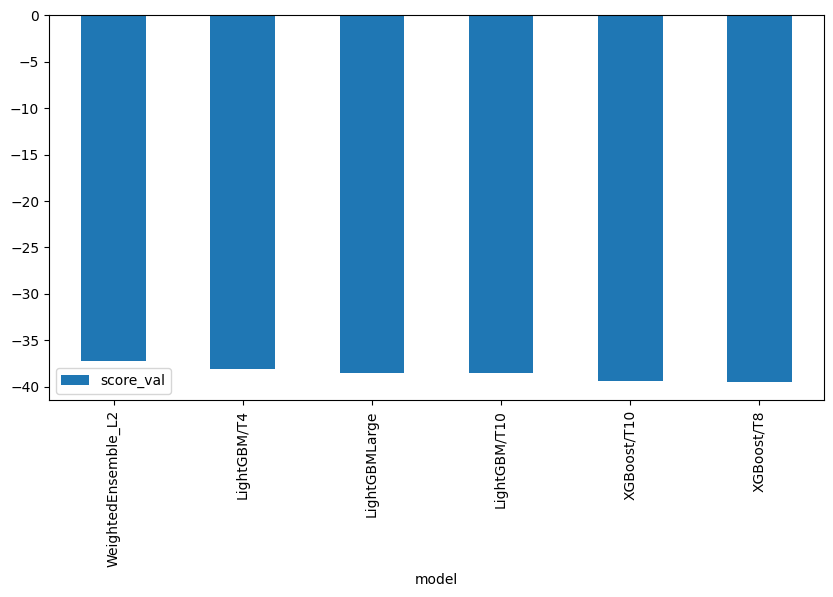

In [77]:
hpo2.plot(kind="bar", x="model", y="score_val", figsize=(10, 5))
plt.show()

In [78]:
predictions_new_hpo2 = predictor_new_hpo2.predict(test)
predictions_new_hpo2.head()

0    19.097284
1     3.481484
2     1.026048
3     1.034595
4     0.996056
Name: count, dtype: float32

In [79]:
predictions_new_hpo2[predictions_new_hpo2<0] = 0
(predictions_new_hpo2 < 0).sum().sum()

0

In [80]:
submission_new_hpo2 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo2["count"] = predictions_new_hpo2
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [81]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 2"

100% 188k/188k [00:00<00:00, 389kB/s] 
Successfully submitted to Bike Sharing Demand

In [82]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 16

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2024-05-09 04:56:54  new features with hyperparameters 2  pending                              
submission_new_hpo1.csv      2024-05-09 04:53:39  new features with hyperparameters 1  complete  0.53243      0.53243       
submission_new_features.csv  2024-05-09 04:38:01  new features                         complete  0.48708      0.48708       
submission.csv               2024-05-09 04:26:56  first raw submission                 complete  1.79942      1.79942       
submission_new_hpo1.csv      2024-05-05 16:35:21  new features with hyperparameters 3  complete  0.52539      0.52539       
submission_new_hpo1.csv      2024-05-05 15:58:46  new features with hyperparameters 2  complete  0.52539      0.52539       


##HPO3

In [83]:
nn_options = {'num_epochs': 5,
              'learning_rate': ag.common.space.Real(1e-4, 1e-2, default=5e-4, log=True),
              'activation': ag.common.space.Categorical('relu', 'softrelu', 'tanh'),
              'dropout_prob': ag.common.space.Real(0.0, 0.5, default=0.1)}

knn_options = [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}},
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}}]

gbm_options = [{'extra_trees': True,
                'num_boost_round': ag.common.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.common.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' depricated
                'eval_metric': 'rmse',
                'eta':.3,
                'max_depth':ag.common.space.Int(lower=5, upper=8, default=6),
                'n_estimators': ag.common.space.Int(lower=100, upper=500, default=100),
                'subsample': 1,
                'colsample_bytree': 1}]

rf_options = {'criterion': 'squared_error',
              'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

xt_options = {'criterion': 'squared_error',
              'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}


hyperparameters = {'GBM': gbm_options,
                  #  'NN_TORCH': nn_options,
                   'XGB': xgb_options,
                   'KNN': knn_options,
                   'RF': rf_options,
                   'XT': xt_options,
                   }

hyperparameter_tune_kwargs = {
    'num_trials': 12,
    'scheduler' : "local",
    'searcher' : 'auto'
}


In [84]:
predictor_new_hpo3 = TabularPredictor(label="count",
                                          problem_type= 'regression',
                                          eval_metric="root_mean_squared_error",
                                          learner_kwargs={"ignored_columns":["casual", "registered"]}).fit(train_data=train,
                                                                                              time_limit=600,
                                                                                              hyperparameters=hyperparameters,
                                                                                              hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                                              presets=['optimize_for_deployment'],
                                                                                              refit_full='best',
                                                                                              excluded_model_types=['NN_TORCH'])

No path specified. Models will be saved in: "AutogluonModels/ag-20240509_045656"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240509_045656"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       10.05 GB / 12.67 GB (79.3%)
Disk Space Avail:   43.46 GB / 78.19 GB (55.6%)
Train Data Rows:    10886
Train Data Columns: 13
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10289.18 MB
	Train Data (Original)  Memory Usage: 0.61 MB (0.0% of available m

  0%|          | 0/12 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-71.9711	 = Validation score   (-root_mean_squared_error)
	0.45s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-45.8136	 = Validation score   (-root_mean_squared_error)
	0.76s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-47.839	 = Validation score   (-root_mean_squared_error)
	1.38s	 = Training   runtime
	0.17s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-41.7586	 = Validation score   (-root_mean_squared_error)
	1.4s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-66.7598	 = Validation score   (-root_mean_squared_error)
	1.29s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-107.2717	 = Validation score   (-root_mean_squared_error)
	0.8s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-45.7988	 = Validation score   (-root_mean_squared_error)
	0.65s	 = Trainin

  0%|          | 0/12 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924


	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	1.81s	 = Training   runtime
	0.17s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.92s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	3.3s	 = Training   runtime
	0.24s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	10.24s	 = Training   runtime
	1.67s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.4s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	3.47s	 = Training   runtime
	0.35s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-38.6204	 = Validation score   (-root_mean_squared_

  0%|          | 0/12 [00:00<?, ?it/s]

Fitted model: XGBoost/T1 ...
	-41.6992	 = Validation score   (-root_mean_squared_error)
	0.34s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-41.1884	 = Validation score   (-root_mean_squared_error)
	1.12s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-40.3101	 = Validation score   (-root_mean_squared_error)
	1.39s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-45.394	 = Validation score   (-root_mean_squared_error)
	0.51s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-44.855	 = Validation score   (-root_mean_squared_error)
	1.3s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-40.7947	 = Validation score   (-root_mean_squared_error)
	1.03s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: XGBoost/T7 ...
	-43.0376	 = Validation score   (-root_mean_squared_error)
	0.72s	 = Training   runtime
	0.05s	 = V

In [85]:
predictor_new_hpo3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.195147  root_mean_squared_error       2.475828  25.515579                0.000672           0.040862            2       True          7
1          LightGBM/T4 -38.124006  root_mean_squared_error       1.670453  10.241829                1.670453          10.241829            1       True          1
2        LightGBMLarge -38.516436  root_mean_squared_error       0.153900   2.440306                0.153900           2.440306            1       True          6
3         LightGBM/T10 -38.559673  root_mean_squared_error       0.028337   1.026114                0.028337           1.026114            1       True          2
4          XGBoost/T10 -39.410484  root_mean_squared_error       0.040111   1.489937                0.040111           1.48

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'XGBoost/T8': 'XGBoostModel',
  'XGBoost/T10': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -38.12400606131232,
  'LightGBM/T10': -38.55967268294494,
  'ExtraTreesMSE': -39.584076050325685,
  'XGBoost/T8': -39.51849963855003,
  'XGBoost/T10': -39.410484338521215,
  'LightGBMLarge': -38.51643622165731,
  'WeightedEnsemble_L2': -37.195146699531826},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': ['LightGBM', 'T4'],
  'LightGBM/T10': ['LightGBM', 'T10'],
  'ExtraTreesMSE': ['ExtraTreesMSE'],
  'XGBoost/T8': ['XGBoost', 'T8'],
  'XGBoost/T10': ['XGBoost', 'T10'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T4': 10.241828918457031,
  'LightGBM/T10': 1.026113510131836,
  'ExtraTreesMSE': 7.63956928253

In [86]:
hpo3 =   pd.DataFrame(predictor_new_hpo2.leaderboard(silent=True))
hpo3

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.272872,root_mean_squared_error,1.340346,18.634906,0.000838,0.058498,2,True,6
1,LightGBM/T4,-38.124006,root_mean_squared_error,1.002783,11.423970,1.002783,11.423970,1,True,1
2,LightGBMLarge,-38.516436,root_mean_squared_error,0.171192,2.301501,0.171192,2.301501,1,True,5
3,LightGBM/T10,-38.559673,root_mean_squared_error,0.068808,1.638927,0.068808,1.638927,1,True,2
4,XGBoost/T10,-39.410484,root_mean_squared_error,0.054529,1.178359,0.054529,1.178359,1,True,4
5,XGBoost/T8,-39.518500,root_mean_squared_error,0.042197,2.033651,0.042197,2.033651,1,True,3


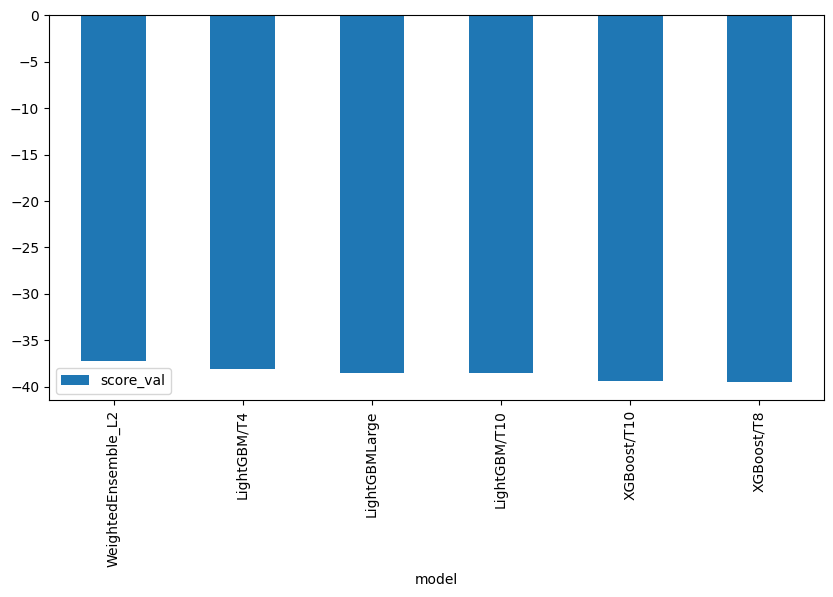

In [87]:
hpo3.plot(kind="bar", x="model", y="score_val", figsize=(10, 5))
plt.show()

In [88]:
predictions_new_hpo3 = predictor_new_hpo3.predict(test)
predictions_new_hpo3.head()

0    18.397808
1     3.727878
2     1.424117
3     1.451485
4     1.426550
Name: count, dtype: float32

In [89]:
predictions_new_hpo3[predictions_new_hpo3<0] = 0
(predictions_new_hpo3 < 0).sum().sum()

0

In [90]:
submission_new_hpo3 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo3["count"] = predictions_new_hpo3
submission_new_hpo3.to_csv("submission_new_hpo3.csv", index=False)

In [91]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 3"

100% 188k/188k [00:00<00:00, 395kB/s]  
Successfully submitted to Bike Sharing Demand

In [96]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 16

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2024-05-09 04:59:48  new features with hyperparameters 3  complete  0.53243      0.53243       
submission_new_hpo1.csv      2024-05-09 04:56:54  new features with hyperparameters 2  complete  0.53243      0.53243       
submission_new_hpo1.csv      2024-05-09 04:53:39  new features with hyperparameters 1  complete  0.53243      0.53243       
submission_new_features.csv  2024-05-09 04:38:01  new features                         complete  0.48708      0.48708       
submission.csv               2024-05-09 04:26:56  first raw submission                 complete  1.79942      1.79942       
submission_new_hpo1.csv      2024-05-05 16:35:21  new features with hyperparameters 3  complete  0.52539      0.52539       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

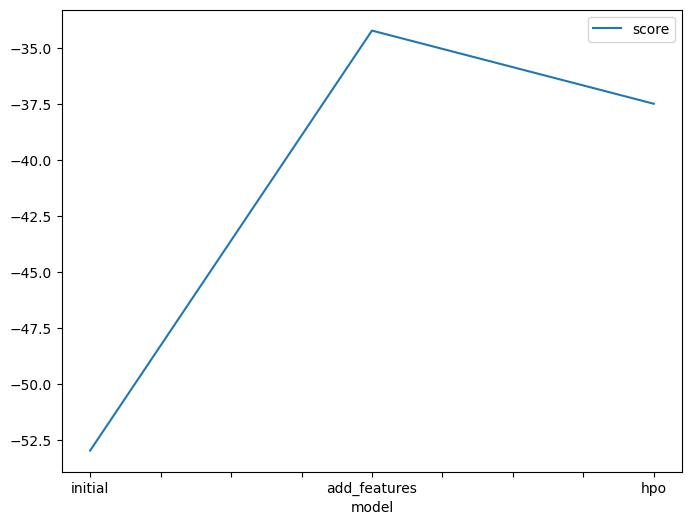

In [95]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.9702 ,-34.2031 ,-37.472579  ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

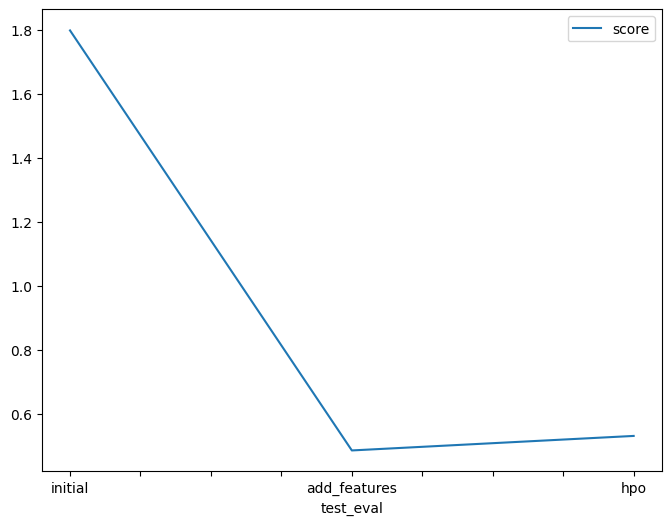

In [97]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79942, 0.48708, 0.53243 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["as mentioned", ?, ?],
    "hpo2": ["as mentioned", ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})